<a href="https://colab.research.google.com/github/lilig2005/Diplomado/blob/main/Tarea_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as stat
%matplotlib inline

In [2]:
from google.colab import files
files.upload()

Saving Datos_iris.csv to Datos_iris.csv


{'Datos_iris.csv': b'"sepal.length","sepal.width","petal.length","petal.width","variety"\n5.1,3.5,1.4,.2,"Setosa"\n4.9,3,1.4,.2,"Setosa"\n4.7,3.2,1.3,.2,"Setosa"\n4.6,3.1,1.5,.2,"Setosa"\n5,3.6,1.4,.2,"Setosa"\n5.4,3.9,1.7,.4,"Setosa"\n4.6,3.4,1.4,.3,"Setosa"\n5,3.4,1.5,.2,"Setosa"\n4.4,2.9,1.4,.2,"Setosa"\n4.9,3.1,1.5,.1,"Setosa"\n5.4,3.7,1.5,.2,"Setosa"\n4.8,3.4,1.6,.2,"Setosa"\n4.8,3,1.4,.1,"Setosa"\n4.3,3,1.1,.1,"Setosa"\n5.8,4,1.2,.2,"Setosa"\n5.7,4.4,1.5,.4,"Setosa"\n5.4,3.9,1.3,.4,"Setosa"\n5.1,3.5,1.4,.3,"Setosa"\n5.7,3.8,1.7,.3,"Setosa"\n5.1,3.8,1.5,.3,"Setosa"\n5.4,3.4,1.7,.2,"Setosa"\n5.1,3.7,1.5,.4,"Setosa"\n4.6,3.6,1,.2,"Setosa"\n5.1,3.3,1.7,.5,"Setosa"\n4.8,3.4,1.9,.2,"Setosa"\n5,3,1.6,.2,"Setosa"\n5,3.4,1.6,.4,"Setosa"\n5.2,3.5,1.5,.2,"Setosa"\n5.2,3.4,1.4,.2,"Setosa"\n4.7,3.2,1.6,.2,"Setosa"\n4.8,3.1,1.6,.2,"Setosa"\n5.4,3.4,1.5,.4,"Setosa"\n5.2,4.1,1.5,.1,"Setosa"\n5.5,4.2,1.4,.2,"Setosa"\n4.9,3.1,1.5,.2,"Setosa"\n5,3.2,1.2,.2,"Setosa"\n5.5,3.5,1.3,.2,"Setosa"\n4.9,3.6

1. Consiga el conjunto de datos iris.csv. (ver enlace adjunto)
2. Escriba una clase iterable que tenga la siguiente funcionalidad
2.1 Al instanciar un objeto, lee el archivo de datos y lo coloca en un dataframe interno en la clase.
2.2 Cada vez que se le pidan datos, debe regresar los dos siguientes datos.
2.3 Imprima "error" si los datos se han agotado.

In [3]:
datos=pd.read_csv('Datos_iris.csv')
print(datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [4]:
class IrisDataReader:
    def __init__(self, csv_file):
        self.dataframe = pd.read_csv('Datos_iris.csv')
        self.current_index = 0
    def __iter__(self):
        return self
    def __next__(self):
        if self.current_index >= len(self.dataframe):
            raise StopIteration("error")
        data1 = self.dataframe.iloc[self.current_index]
        data2 = self.dataframe.iloc[self.current_index + 1]
        self.current_index += 2
        return data1, data2
reader = IrisDataReader("Datos_iris.csv")
try:
    dato1, dato2 = next(reader)
    print("Dato 1:")
    print(dato1)
    print("Dato 2:")
    print(dato2)
except StopIteration:
    print("Error: Los datos se han agotado.")

Dato 1:
sepal.length       5.1
sepal.width        3.5
petal.length       1.4
petal.width        0.2
variety         Setosa
Name: 0, dtype: object
Dato 2:
sepal.length       4.9
sepal.width        3.0
petal.length       1.4
petal.width        0.2
variety         Setosa
Name: 1, dtype: object


3. Escriba una clase con las siguientes funcionalidades:
3.1 Al instanciar un objeto, lee un conjunto de datos numéricos. Por ejemplo puede usar el mismo conjunto de datos iris.csv. Instancie los datos en un dataframe de Pandas.
3.2 Implemente un método que calcule las estadísticas descriptivas básicas de cada una de las variables (sepal.length, sepal.width, petal.length, etc)
3.3 Implemente un método que entregue los nombre de las variables disponibles.
3.3 Implemente un método que reciba el nombre de una variable disponible dentro del objeto (en el dataframe) y regrese: sus estadísticas básicas: media, mediana, desviación, percentiles q25, q50, q75 y dibuje un histograma de la distribución de la variable.

In [5]:
datos.head(3)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa


In [6]:
datos.dtypes
print('\n')
display(datos.describe())
print('\n')
display(datos.describe(include='all'))

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


,sepal.length,sepal.width,petal.length,petal.width,variety
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [7]:
list(datos.columns)

['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety']

In [8]:
variable=datos['sepal.length']
variable

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal.length, Length: 150, dtype: float64

In [9]:
variable_tabla=pd.DataFrame(variable)
media=np.mean(variable)
print('La media es ',media)
mediana=np.median(variable)
print('La mediana es:',mediana)
varianza=stat.variance(variable)
print("La varianza es:",varianza)
cuartiles=np.percentile(variable, [25, 50, 75])
print('Cuartiles:')
print('Q1 (25%):', cuartiles[0])
print('Q2 (50% - Mediana):', cuartiles[1])
print('Q3 (75%)', cuartiles[2])

La media es  5.843333333333334
La mediana es: 5.8
La varianza es: 0.6856935123042506
Cuartiles:
Q1 (25%): 5.1
Q2 (50% - Mediana): 5.8
Q3 (75%) 6.4


In [10]:
display(variable.describe(include='all'))

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal.length, dtype: float64

Text(0.5, 1.0, 'Histograma de Datos')

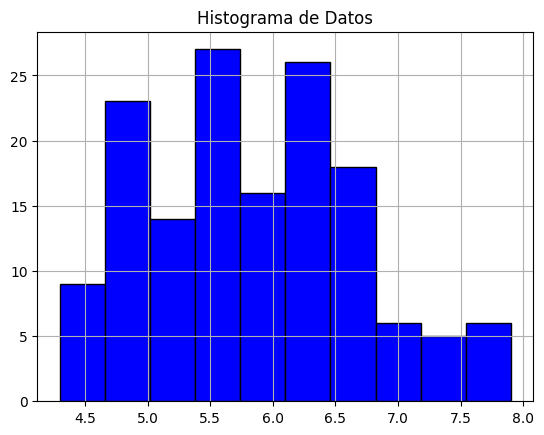

In [11]:
plt.hist(variable, bins=10, edgecolor='k',color='b')
plt.grid(True)
plt.title('Histograma de Datos')